In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

In [4]:
df_oct = pd.read_csv('COVID_Cases_Restricted_Detailed_10312020.csv')
df_oct.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-08-26,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
1,"White, Non-Hispanic",Laboratory-confirmed case,2020-08-23,Male,2020-07-07,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
2,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-09-02,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
3,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-09-01,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years
4,"White, Non-Hispanic",Laboratory-confirmed case,2020-09-18,Male,2020-09-01,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.0,ADAMS,NE,10 - 19 Years


In [5]:
df_oct_lab_confirmed = df_oct.loc[df_oct['current_status'] == 'Laboratory-confirmed case']
df_oct_lab_confirmed['death_yn'].value_counts()

No         2562482
Missing    2150369
Unknown     601828
Yes         148099
Name: death_yn, dtype: int64

In [6]:
df_death_grouped_age = df_oct_lab_confirmed.loc[df_oct_lab_confirmed['death_yn'] == 'Yes']
df_death_grouped_age = df_death_grouped_age[['current_status','age_group']].groupby('age_group').count()
df_death_grouped_age

,current_status
age_group,
0 - 9 Years,49
10 - 19 Years,93
20 - 29 Years,674
30 - 39 Years,1841
40 - 49 Years,4465
50 - 59 Years,11513
60 - 69 Years,24589
70 - 79 Years,36445
80+ Years,67296


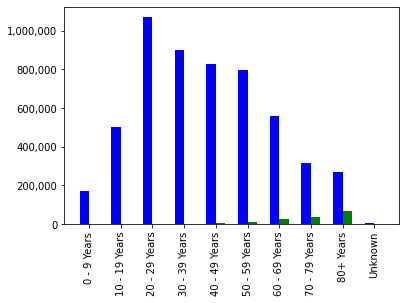

In [7]:
df_confirmed_grouped_age = df_oct_lab_confirmed[['current_status','age_group']].groupby('age_group').count()
names = df_confirmed_grouped_age.index
values = df_confirmed_grouped_age['current_status']
deaths = df_death_grouped_age['current_status']

x = np.arange(10)
fig, ax = plt.subplots()
#plt.xticks(rotation=90)
w = 0.3
plt.xticks(x + w /2, names, rotation='vertical')
ax.bar(x, values, width=w, color='b', align='center')
#ax1 = ax.twinx()
ax.bar(x + w, deaths, width=w,color='g',align='center')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [22]:
df_group_age_race = df_oct.loc[df_oct['current_status'] == 'Laboratory-confirmed case']
df_group_age_race = df_group_age_race[['current_status','age_group','race_ethnicity_combined']].groupby(['age_group','race_ethnicity_combined'], as_index=False).count()
df_group_age_race

,age_group,race_ethnicity_combined,current_status
0,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",1749
1,0 - 9 Years,"Asian, Non-Hispanic",2326
2,0 - 9 Years,"Black, Non-Hispanic",17533
3,0 - 9 Years,Hispanic/Latino,42407
4,0 - 9 Years,"Multiple/Other, Non-Hispanic",4190
...,...,...,...
72,Unknown,"Black, Non-Hispanic",232
73,Unknown,Hispanic/Latino,102
74,Unknown,"Multiple/Other, Non-Hispanic",22
75,Unknown,Unknown,3784


In [47]:
pdata = pd.crosstab(df_group_age_race['age_group'],df_group_age_race['race_ethnicity_combined'], values = df_group_age_race['current_status'], aggfunc = sum )
pdata

race_ethnicity_combined,"American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,"Multiple/Other, Non-Hispanic","Native Hawaiian/Other Pacific Islander, Non-Hispanic",Unknown,"White, Non-Hispanic"
age_group,,,,,,,,
0 - 9 Years,1749.0,2326.0,17533.0,42407.0,4190.0,299.0,61905.0,28654.0
10 - 19 Years,3504.0,5126.0,39015.0,89722.0,12746.0,788.0,196873.0,136465.0
20 - 29 Years,6117.0,16515.0,95059.0,178442.0,29447.0,1913.0,443885.0,276396.0
30 - 39 Years,6356.0,16417.0,95257.0,173855.0,23960.0,1732.0,369568.0,189347.0
40 - 49 Years,5049.0,13783.0,84946.0,163674.0,21048.0,1346.0,337230.0,181274.0
50 - 59 Years,4620.0,13092.0,87121.0,120908.0,20434.0,917.0,316836.0,214344.0
60 - 69 Years,3046.0,9480.0,66468.0,62629.0,14413.0,552.0,204896.0,177867.0
70 - 79 Years,1326.0,4383.0,35018.0,27007.0,7472.0,170.0,101238.0,124486.0
80+ Years,632.0,3716.0,22392.0,16450.0,6526.0,23.0,83246.0,123085.0


Text(0.5, 0, 'age_group')

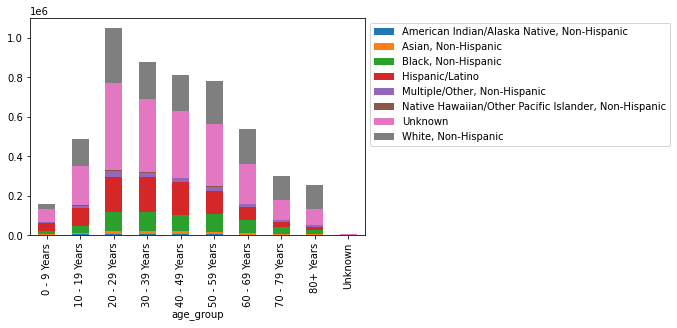

In [49]:
races = df_group_age_race['race_ethnicity_combined'].unique()
pdata[races].plot(kind="bar", stacked = True).legend(bbox_to_anchor=(1,1))
plt.xlabel('age_group')